In [1]:
import pandas as pd
import numpy as np
import sys

try:
    import tsad
except:
    import sys
    sys.path.insert(1, '../')
    from tsad.evaluating.evaluating import evaluating

import warnings
warnings.filterwarnings('ignore')

# Simple example

## Init true and prediction labelled data

In [2]:
true = pd.Series(0,pd.date_range('2020-01-01','2020-01-20',freq='D'))
true.iloc[[6,14]]=1

prediction = pd.Series(0,pd.date_range('2020-01-01','2020-01-20',freq='D'))
prediction.iloc[[4,10]]=1

pd.concat([true,prediction],1).reset_index()

,index,0,1
0,2020-01-01,0,0
1,2020-01-02,0,0
2,2020-01-03,0,0
3,2020-01-04,0,0
4,2020-01-05,0,1
5,2020-01-06,0,0
6,2020-01-07,1,0
7,2020-01-08,0,0
8,2020-01-09,0,0
9,2020-01-10,0,0


## Evaluating by default `NAB` metric

In [4]:
results = evaluating(true=true,prediction=prediction)
print(results)

Since you not choose numenta_time and portion, then portion will be 0.1
Standart  -  -5.5
LowFP  -  -11.0
LowFN  -  -3.67
{'Standart': -5.5, 'LowFP': -11.0, 'LowFN': -3.67}


# Approaches for evaluating of anomaly detection algorithms for time series data

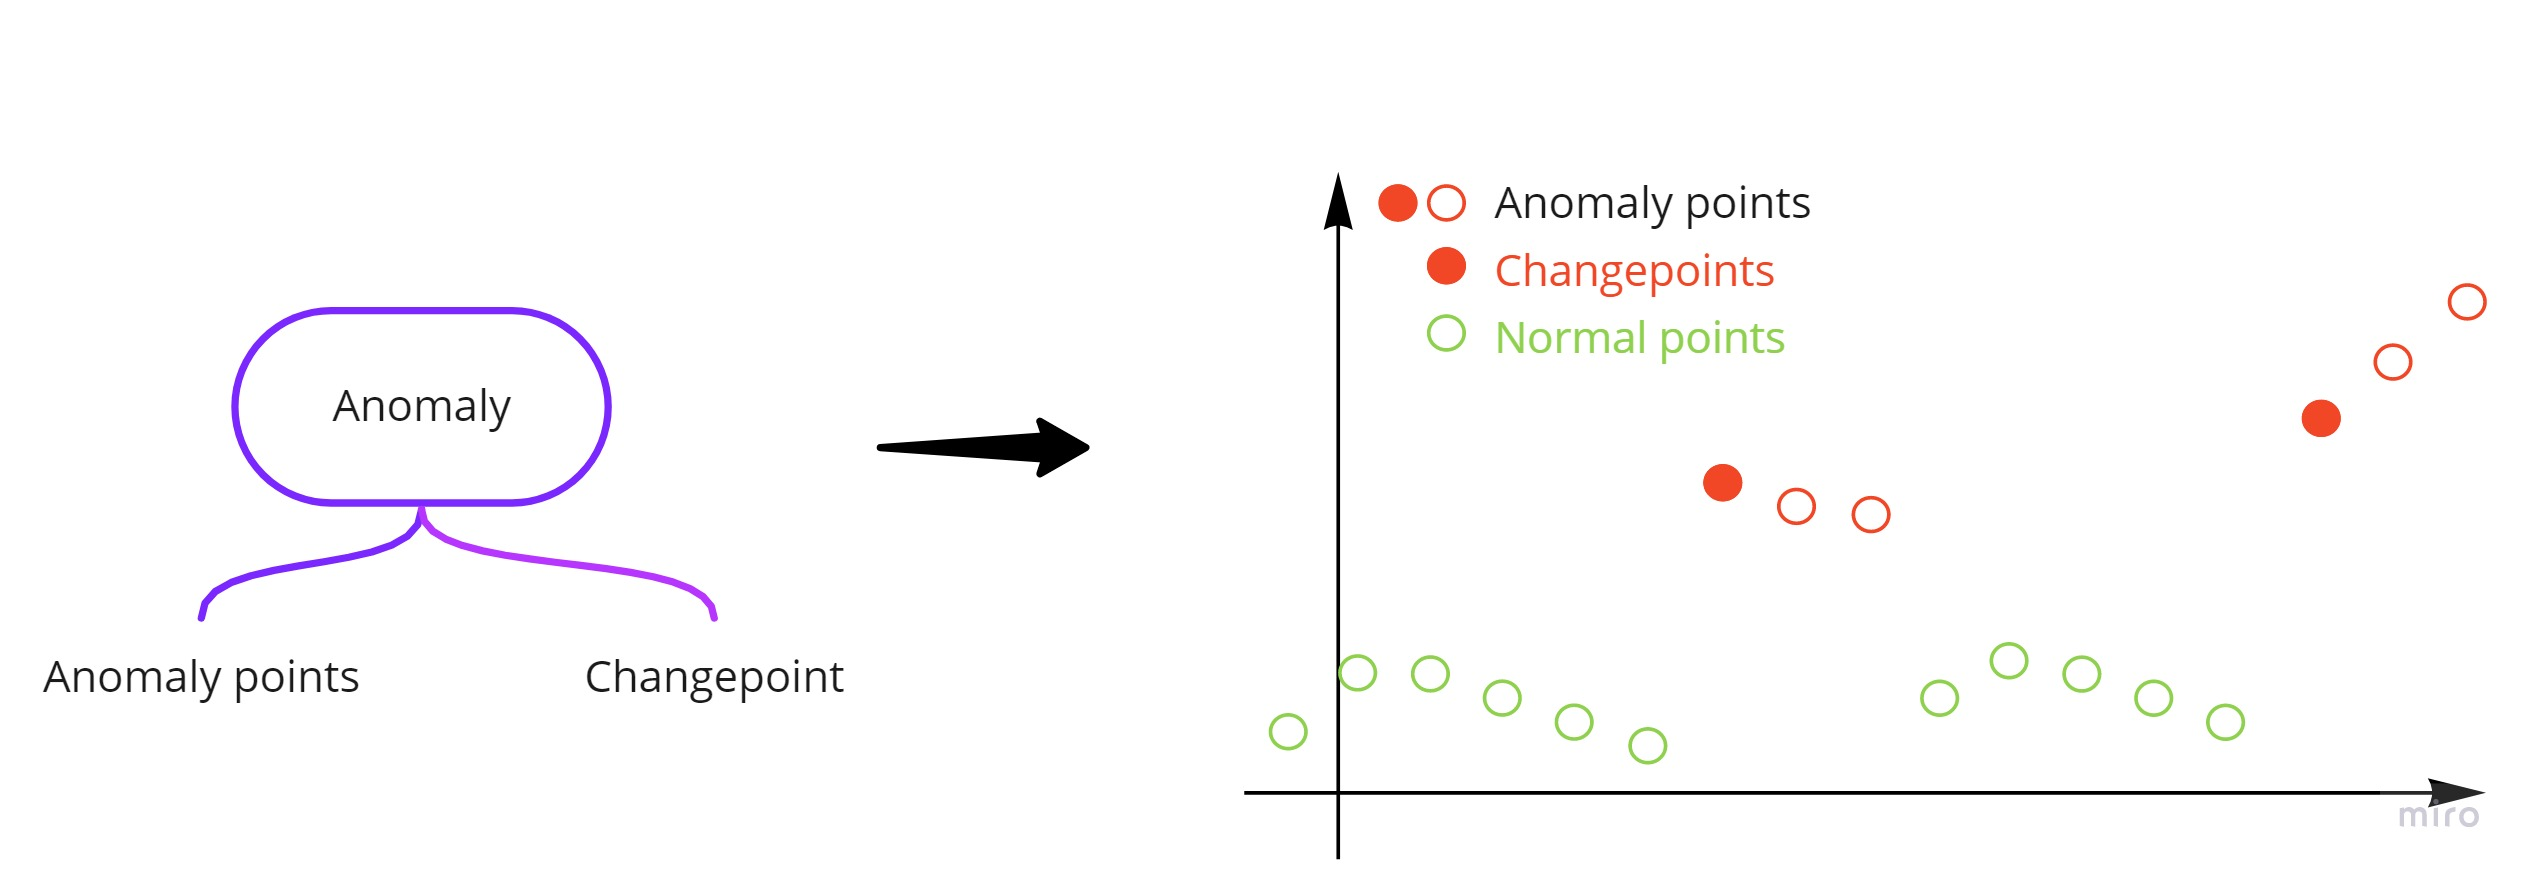

# Metirc for evaluating of AD algorithms for time series data in tsad

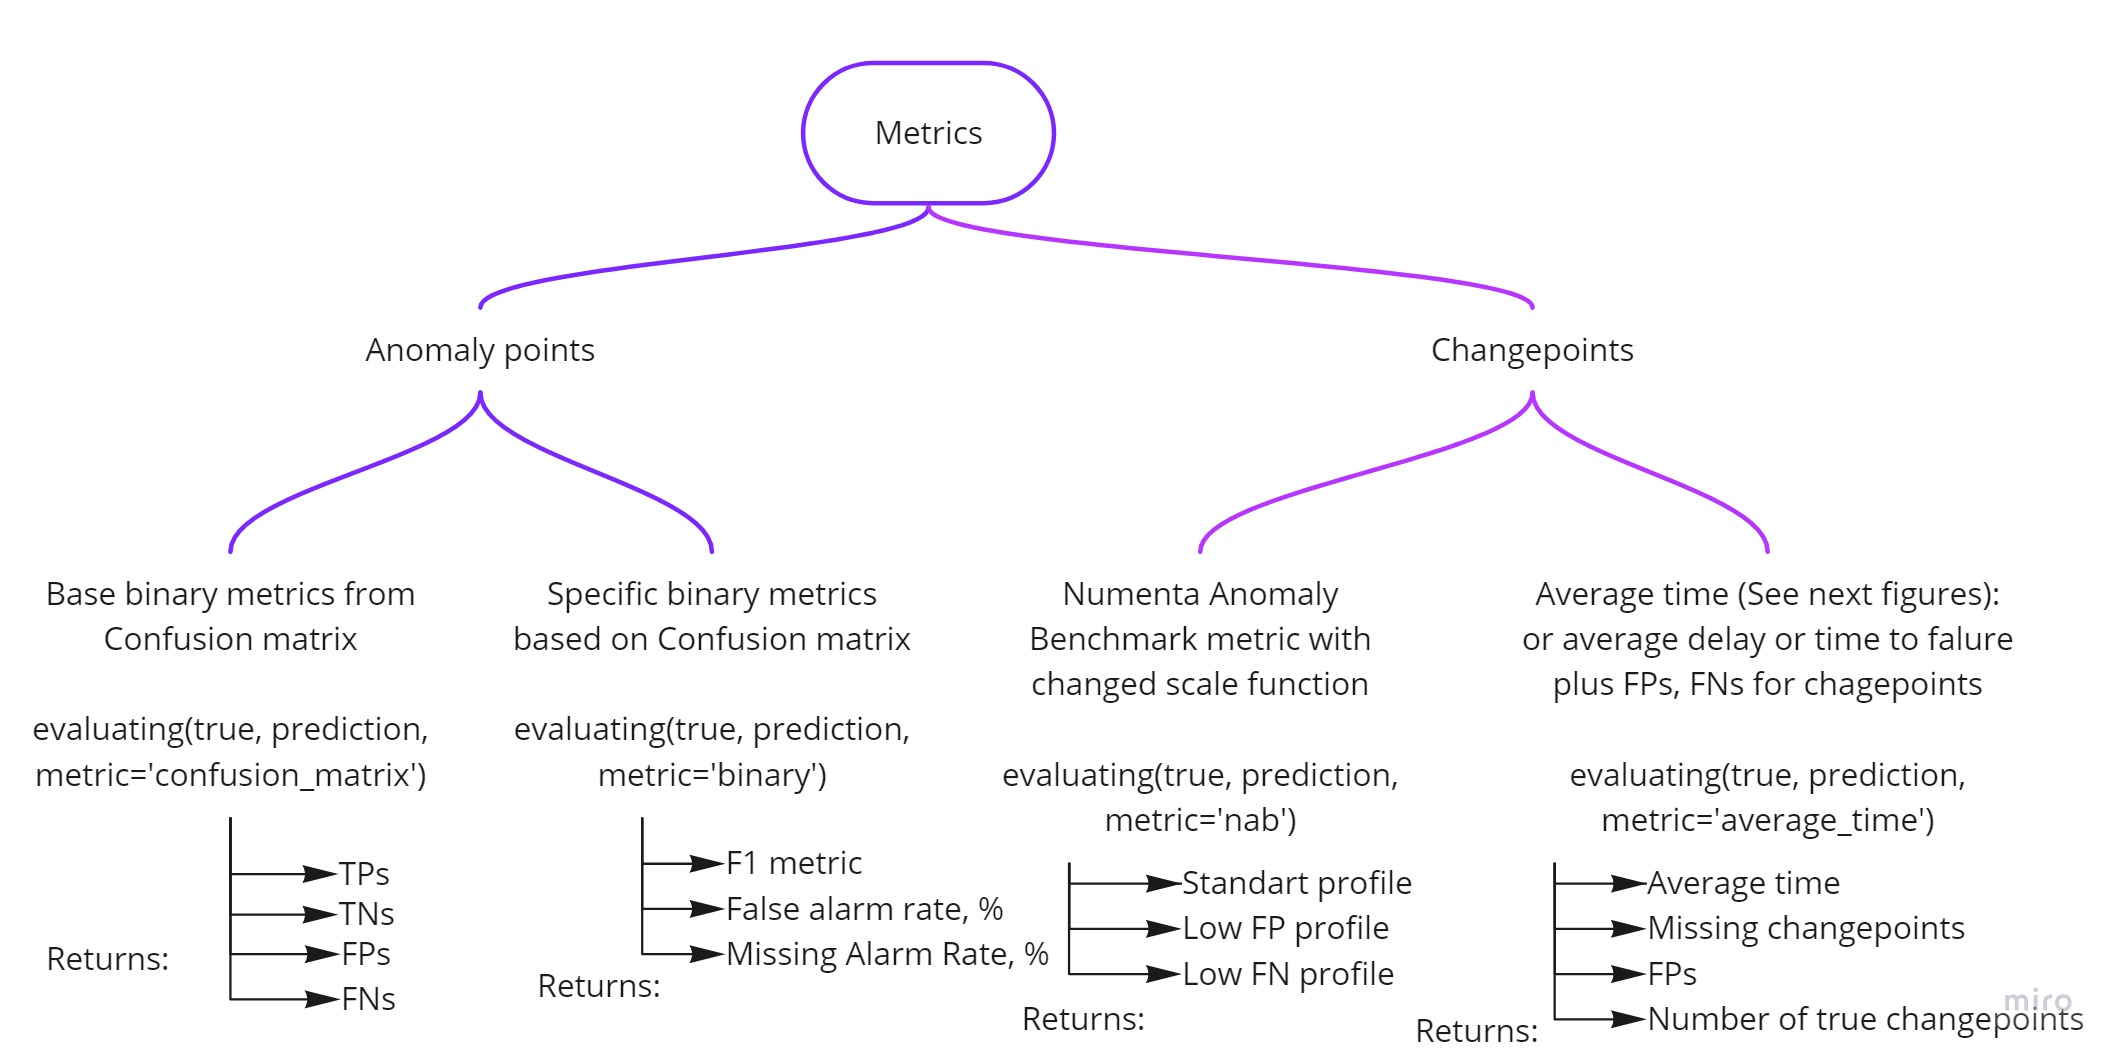

NAB metric: [link](https://ieeexplore.ieee.org/abstract/document/7424283/?casa_token=QrawzPwH7AkAAAAA:vzRggk5TMUviU2JOxxzG76ZlACc3paQhP7KtoUq8jmx7-DkrSWAUp4wZldlTjcqPpap6WPHCeu095g)

# Changepoints metrics

## Variants of input variables

A crucial element for the changepoint detection problem is a detection window:
* The predicted anomalies inside the detection window are perceived as only one true positive
* The absence of predicted anomalies inside the detection window is perceived as only one false negative
* the predicted points outside the detection windows as false positives.

Thus we must assign left and right boundaries of a window for any true changepoint if it is available for a dataset. In TSAD, we have three opportunities for this:
1. ```true``` variable as pd.Series and ```numenta_time``` variable (or ```portion```*)
2. ```true``` variable as a list of true changepoints of pd.Timestamp format and ```numenta_time``` variable  (or ```portion```*)
3. ```true``` variable as boundaries itself as a list (we can have more than one change point for one dataset) of a list (length of 2) with left and right pd.Ttimestamp boundary of the window.

\* The ```portion``` is needed if ```numenta_time = None```. The width of the detection window in this case is equal to a ```portion``` of the width of the length of ```prediction``` divided by the number of real CPs in this dataset. default 0.1.

```prediction``` is always pd.Series for one dataset 

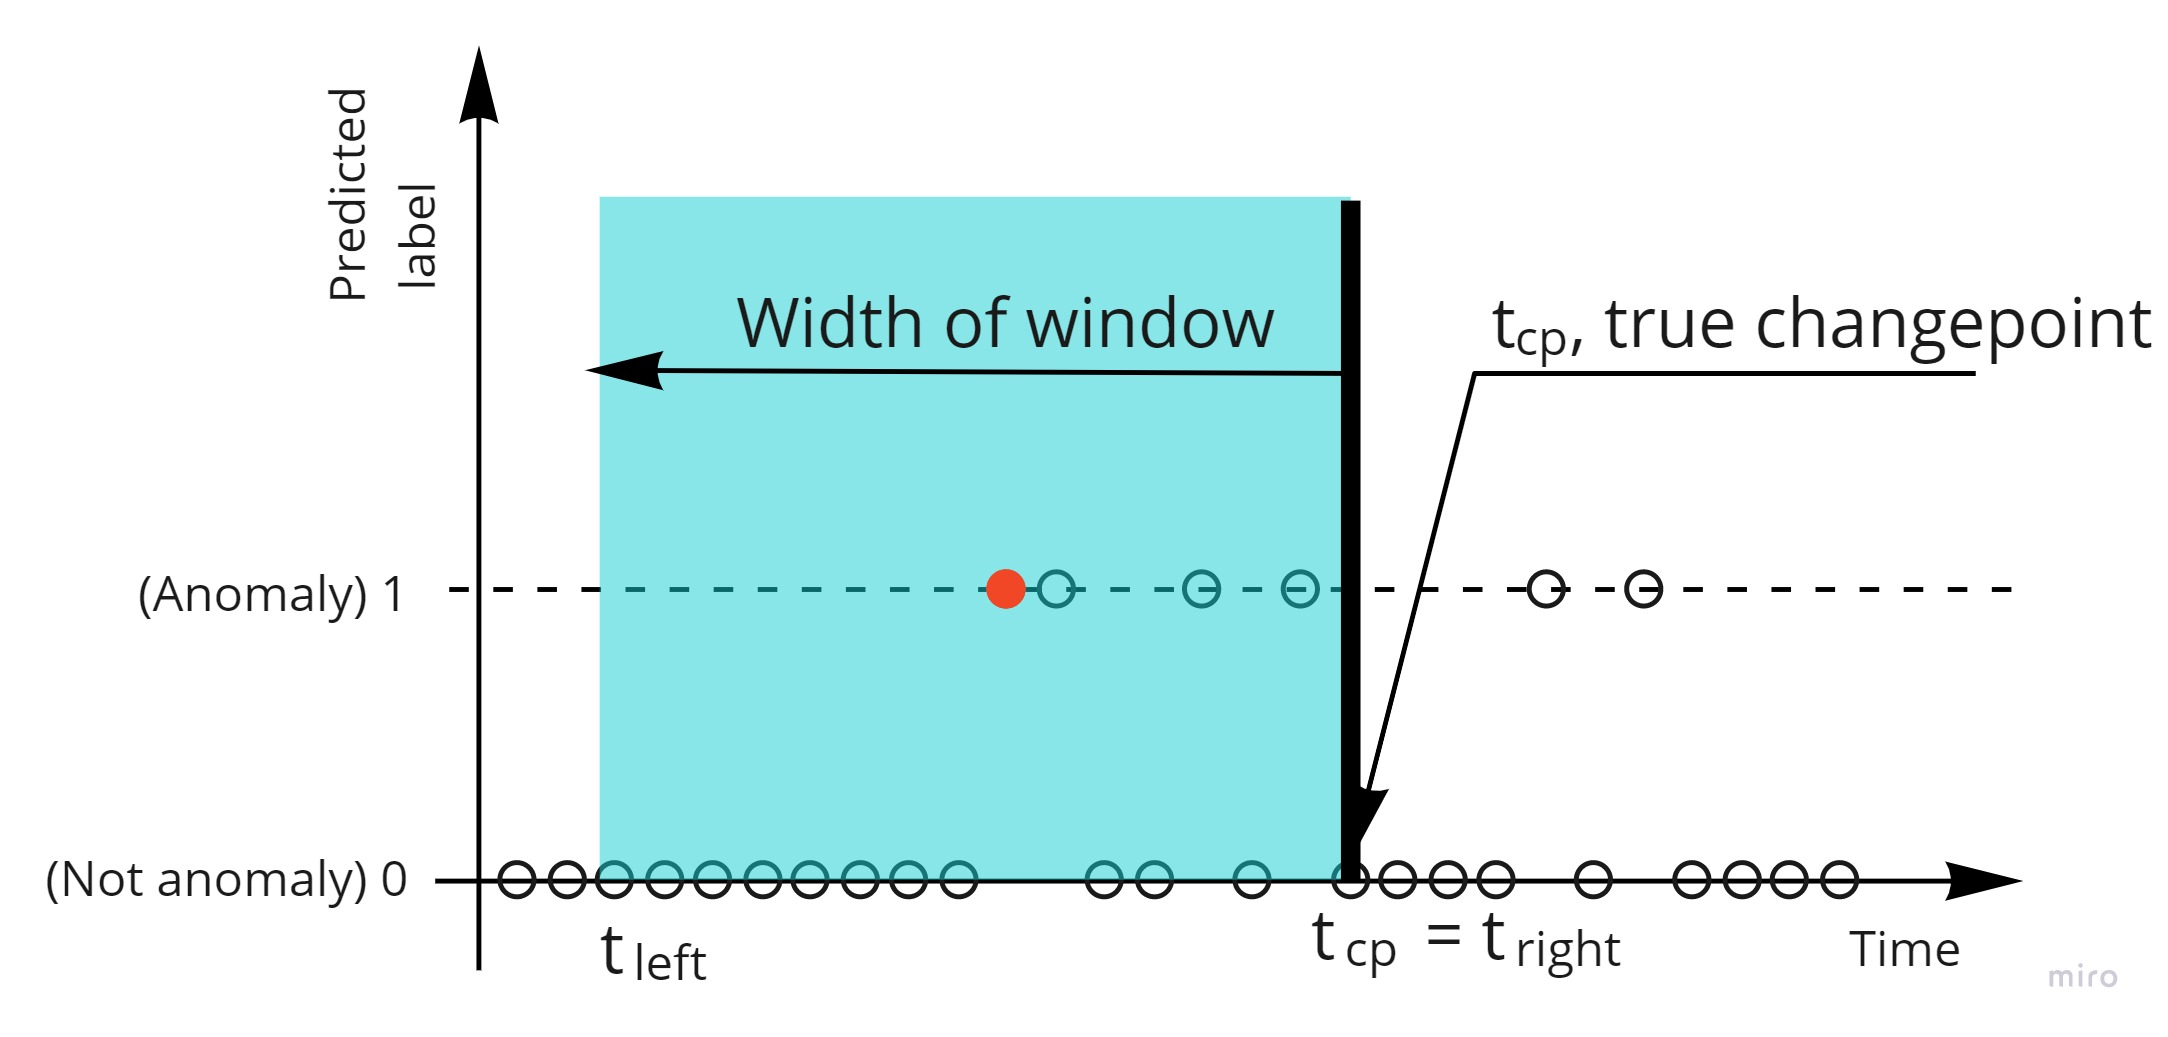

The picture above shows the predicted label values for changepoint problem.The variable ```numenta_time``` is actually with of window.

```prediction``` is always have the same format (pd.Series) for one dataset:

In [28]:
prediction = pd.Series(0,pd.date_range('2020-01-01','2020-01-07',freq='D'))
prediction.iloc[3]=1
prediction

2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    1
2020-01-05    0
2020-01-06    0
2020-01-07    0
Freq: D, dtype: int64

 How would the ```true``` input variable look in each variant:
 ### Variant 1. True as pd.Series

In [29]:
true = pd.Series(0,pd.date_range('2020-01-01','2020-01-07',freq='D'))
true.iloc[5]=1
numenta_time='3D'
true

2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
2020-01-05    0
2020-01-06    1
2020-01-07    0
Freq: D, dtype: int64

In [30]:
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')


Amount of true anomalies 1
A number of missed CPs = 0
A number of FPs = 0
Average time 2 days 00:00:00


From here we can see that we really **correctly detect** the one true chanepoint by given our detection window (which is equal 3 days before changepoint).

**If we not true CPs for specefic dataset**:

In [31]:
true = pd.Series(0,pd.date_range('2020-01-01','2020-01-07',freq='D'))
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')

Amount of true anomalies 0
A number of missed CPs = 0
A number of FPs = 1
Average time nan


 ### Variant 2. True as list of pd.Timestamp

In [32]:
true = [pd.Timestamp('2020-01-06')]
numenta_time='3D'
true

[Timestamp('2020-01-06 00:00:00')]

In [33]:
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')


Amount of true anomalies 1
A number of missed CPs = 0
A number of FPs = 0
Average time 2 days 00:00:00


The same result

**If we not true CPs for specefic dataset**:

In [34]:
true = []
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')

Amount of true anomalies 0
A number of missed CPs = 0
A number of FPs = 1
Average time nan


 ### Variant 3.True as a list of a list with left and right pd.Timestamp boundary of the window

In [35]:
true = [[pd.Timestamp('2020-01-03'),pd.Timestamp('2020-01-06')]]
numenta_time='3D'
true

[[Timestamp('2020-01-03 00:00:00'), Timestamp('2020-01-06 00:00:00')]]

In [36]:
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')


Amount of true anomalies 1
A number of missed CPs = 0
A number of FPs = 0
Average time 2 days 00:00:00


The same result

**If we not true CPs for specefic dataset**:

In [37]:
true = [[]]
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')

Amount of true anomalies 0
A number of missed CPs = 0
A number of FPs = 1
Average time nan


 ### Variant 4,5,6. Many datasets

In [38]:
# if we have 2 the same datasets
prediction = [prediction,prediction]
numenta_time='3D'

true = pd.Series(0,pd.date_range('2020-01-01','2020-01-07',freq='D'))
true.iloc[5]=1
true = [true,true]
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')

true = [pd.Timestamp('2020-01-06')]
true = [true,true]
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')

true = [[pd.Timestamp('2020-01-03'),pd.Timestamp('2020-01-06')]]
true = [true,true]
results = evaluating(true=true,prediction=prediction,numenta_time=numenta_time,metric='average_time')


Amount of true anomalies 2
A number of missed CPs = 0
A number of FPs = 0
Average time 2 days 00:00:00
Amount of true anomalies 2
A number of missed CPs = 0
A number of FPs = 0
Average time 2 days 00:00:00
Amount of true anomalies 2
A number of missed CPs = 0
A number of FPs = 0
Average time 2 days 00:00:00


## Different situations with changepoint detection problem

Assigning characteristics of a window as well as selecting one point in the window must differ depend on business tasks, and in TSAD we seem to foreseen every case for this. Examples of cases from technical diagnostic:
* We have clear anomalies that have to lead to failure. From history, we have objective information about the times of arising anomalies (true changepoints), and we understand that any predicted anomaly that is earlier than the true changepoint is a false positive. 
* We have a failure of a system. From history, we have objective information about the time of failure. But we haven't any information about the anomaly. Thus predicted anomaly that is earlier than the true changepoint to be true positive. 
* We know approximately the time of the anomaly.
* Many other cases.

To meet the business objectives, we make possible to **adjust the following parameters** in ```evaluating```:

### ```anomaly_window_destenation``` for input variant 1,2 of true variable

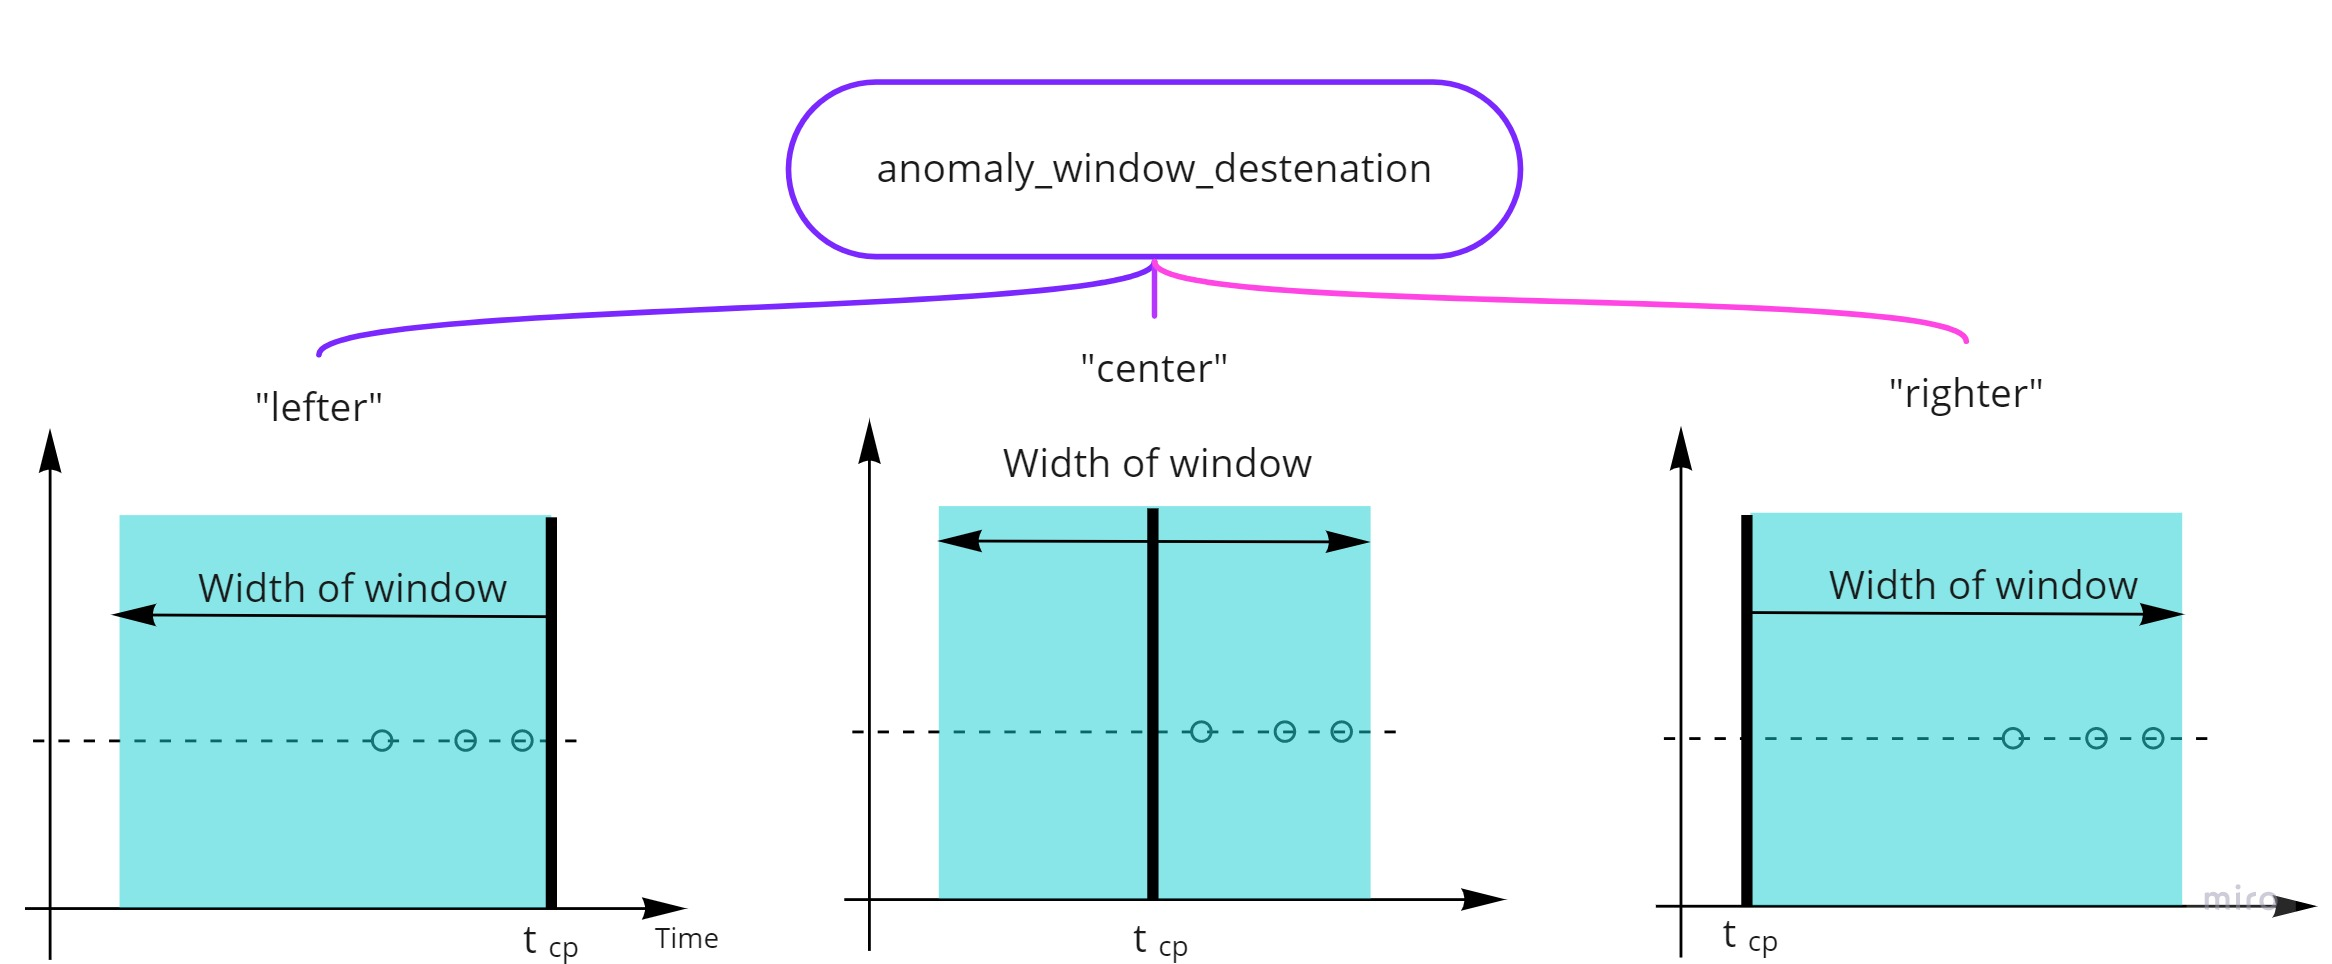

### ```clear_anomalies_mode```

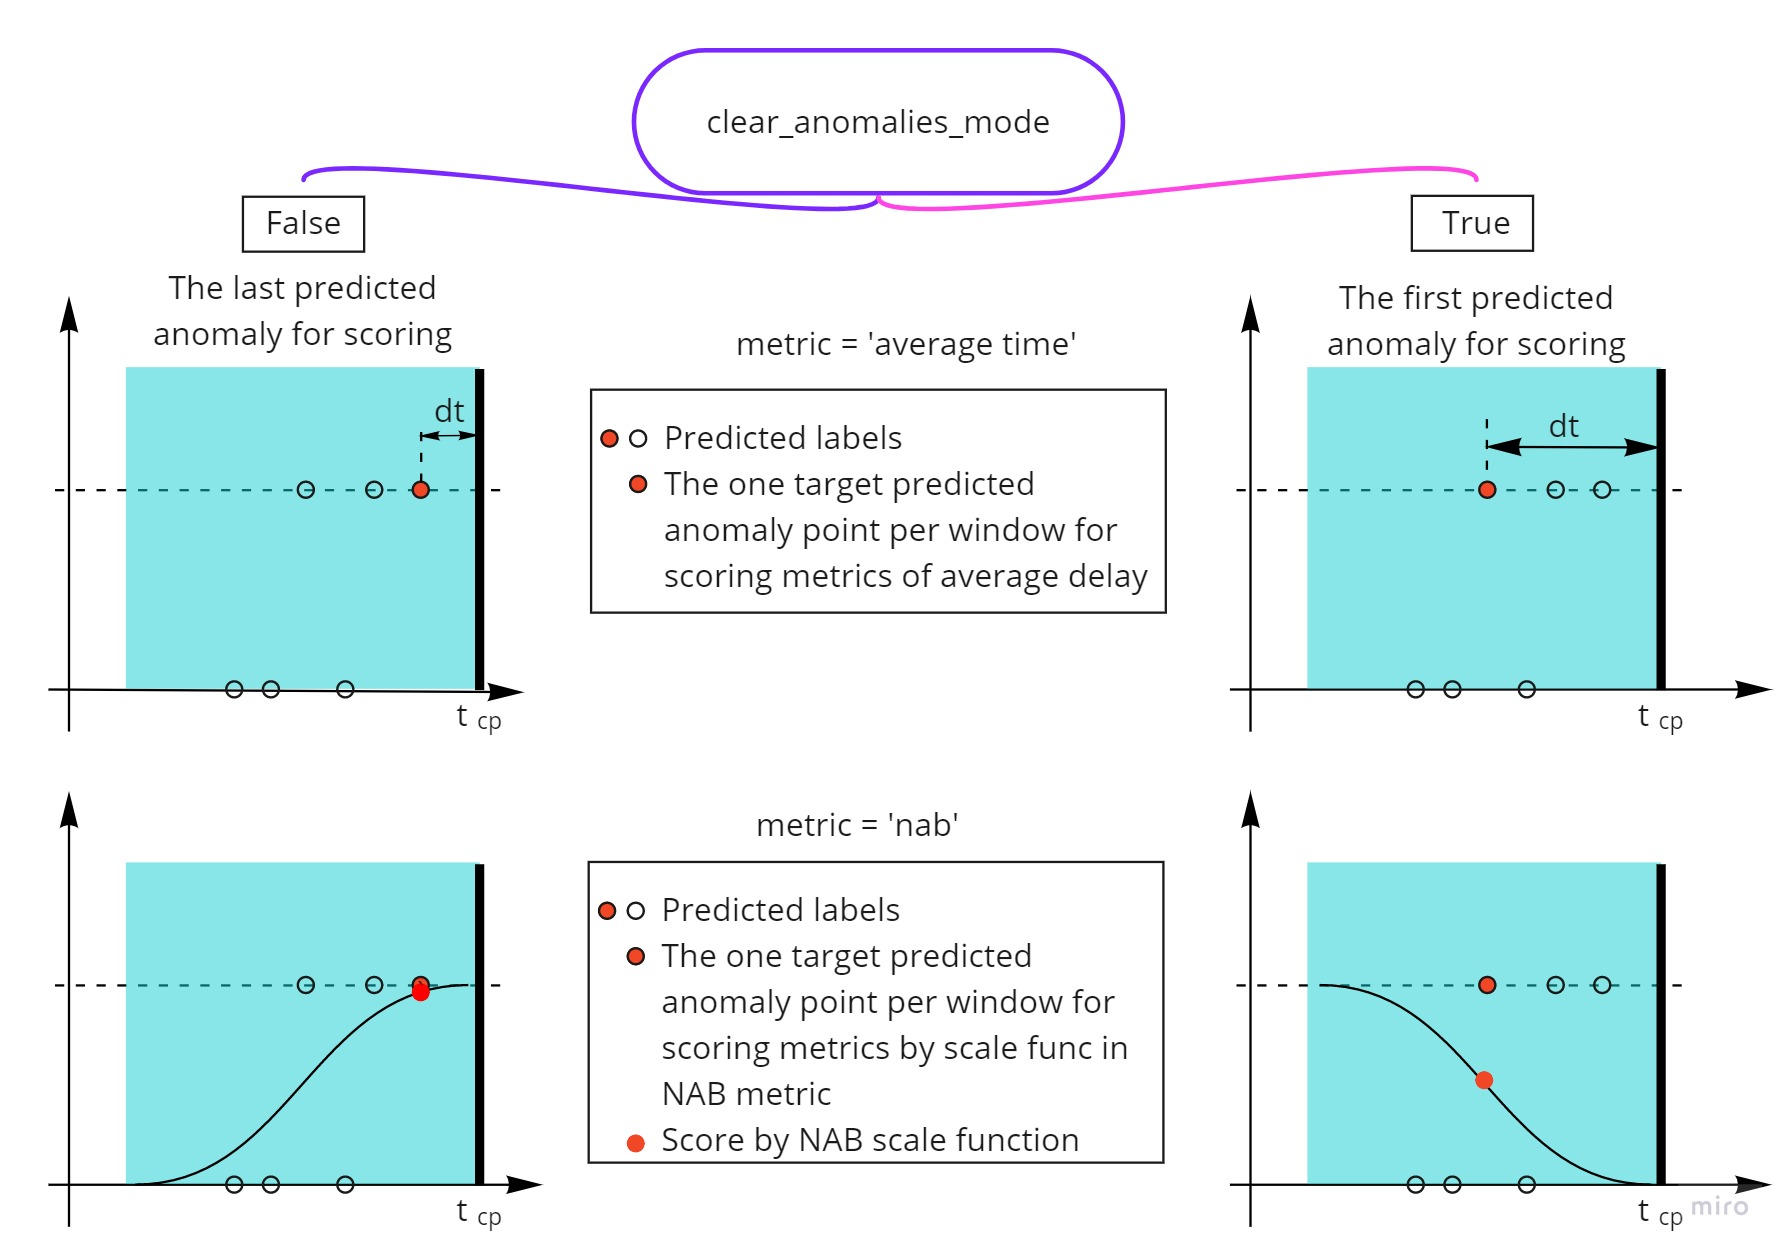

### ```intersection_mode``` for solving a problem of intersection of detection windows

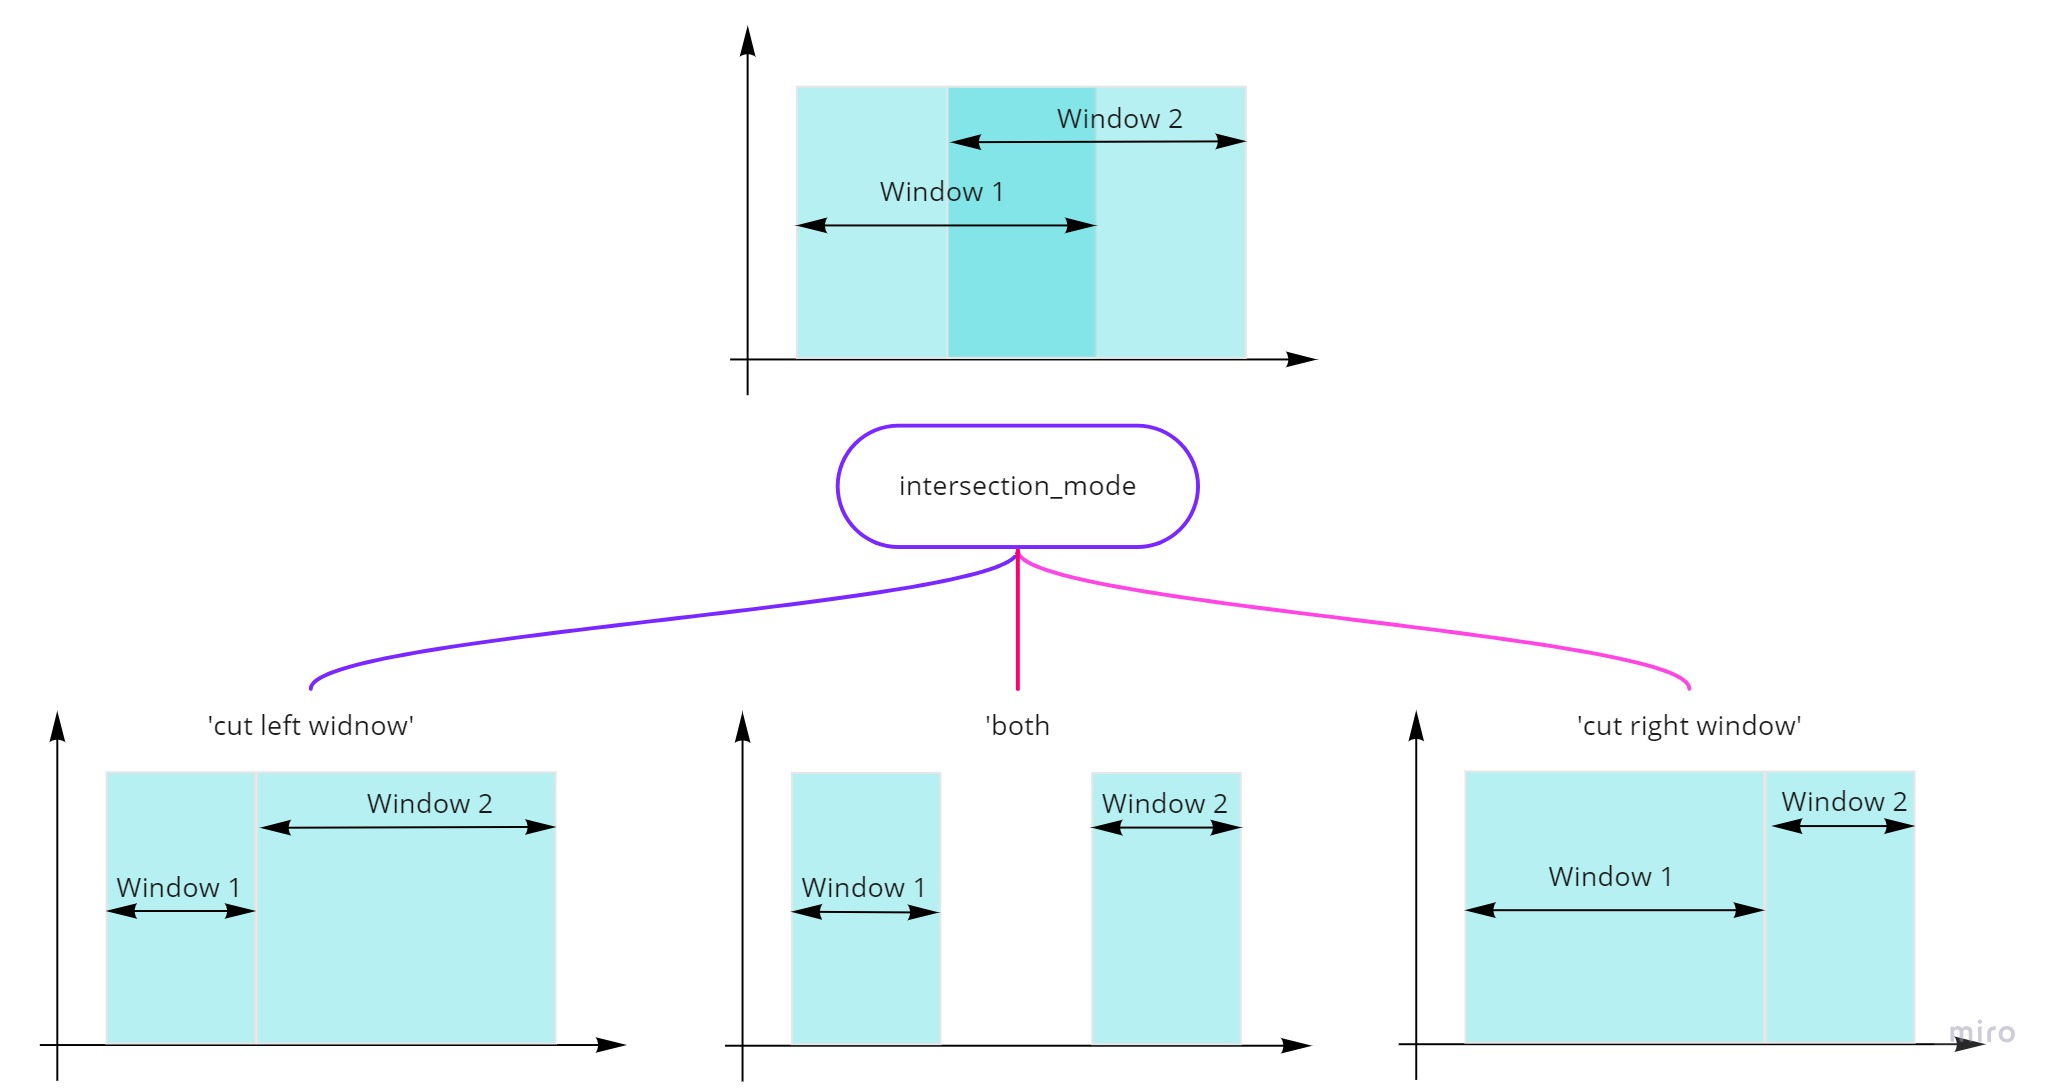